In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('../data/df_br_tokensb.csv').drop(columns = ['Unnamed: 0', 'category'])
df.head(2).T

C:\Users\16156\AppData\Local\Temp\ipykernel_23076\1838378513.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/df_br_tokensb.csv').drop(columns = ['Unnamed: 0', 'category'])


,0,1
business_id,ltBBYdNzkeKdCNPDAsxwAA,Zx7n8mdt8OzLRXVzolXNhQ
name,Tavern,Milk and Honey Nashville
address,1904 Broadway,214 11th Ave S
city,Nashville,Nashville
state,TN,TN
postal_code,37203.0,37203.0
latitude,36.1509,36.154702
longitude,-86.797012,-86.784541
overall_stars,4.0,4.0
review_count,1222,1725


In [ ]:
from gensim import corpora

In [ ]:
%%time
tokenized_texts = [text.split() for text in df['clean']]

In [ ]:
%%time
mydict = corpora.Dictionary(tokenized_texts)

In [ ]:
print(len(mydict.token2id))

In [ ]:
i = 0
# Print top 4 (word, id) tuples
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 3:
        break
    i += 1

In [7]:
X=df['clean']
y= df['review_stars.1']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#?
# Train the tfidf Model 
from gensim.models import TfidfModel


# Make sure the dictionary is created from the previous block
# BOW corpus is required for tfidf model
corpus = [mydict.doc2bow(line) for line in df['clean']]

# TF-IDF Model
tfidf_model = TfidfModel(corpus)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

#### tf-idf vectorizer

In [7]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [8]:
clf.fit(tf_x_train,y_train)

LinearSVC(random_state=0)

In [9]:
y_test_pred=clf.predict(tf_x_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.66      0.77      0.72     11478
           2       0.42      0.25      0.31      8703
           3       0.45      0.30      0.36     12243
           4       0.48      0.38      0.43     25237
           5       0.73      0.88      0.80     50037

    accuracy                           0.64    107698
   macro avg       0.55      0.52      0.52    107698
weighted avg       0.61      0.64      0.61    107698



In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)

In [ ]:
clf.fit(tf_x_train,y_train)
y_test_pred=clf.predict(tf_x_test)

In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.69      0.77      0.73     11478
           2       0.46      0.32      0.38      8703
           3       0.48      0.37      0.42     12243
           4       0.52      0.43      0.47     25237
           5       0.75      0.87      0.81     50037

    accuracy                           0.66    107698
   macro avg       0.58      0.55      0.56    107698
weighted avg       0.63      0.66      0.64    107698



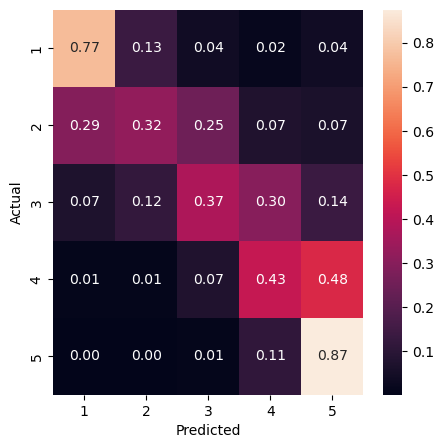

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])

plt.show(block=False)

### tf-idf with ngram_range (1,2)

In [22]:
%%time

vectorizer= TfidfVectorizer(ngram_range=(1,2))
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

CPU times: total: 32.5 s
Wall time: 32.6 s


### Logistic Regression

In [23]:
%%time

clf = LogisticRegression(max_iter=1000,solver='saga')

clf.fit(tf_x_train,y_train)

y_test_pred=clf.predict(tf_x_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.70      0.76      0.73     11478
           2       0.47      0.31      0.37      8703
           3       0.51      0.38      0.43     12243
           4       0.53      0.46      0.49     25237
           5       0.75      0.88      0.81     50037

    accuracy                           0.67    107698
   macro avg       0.59      0.56      0.57    107698
weighted avg       0.65      0.67      0.65    107698

CPU times: total: 34.3 s
Wall time: 34.4 s


In [24]:
(.73+.38+.43+.49+.81)/5

0.568

In [25]:
%%time
lr = LogisticRegression(penalty='l2', max_iter=1000, C=1)
lr.fit(tf_x_train,y_train)
y_test_pred=lr.predict(tf_x_test)
print(classification_report(y_test, y_test_pred))


KeyboardInterrupt



Random Forest
increase ngram 3
-interpretation

#### Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


rf = RandomForestClassifier(max_leaf_nodes=15, n_estimators=1250)
rf.fit(tf_x_train, y_train)
y_train_pred_rf = rf.predict(tf_x_train)
y_test_pred_rf = rf.predict(tf_x_test)

In [ ]:
 from sklearn.metrics import f1_score
print('Train F1 Score: ', f1_score(y_train, y_train_pred_rf, average='macro'))
print('Test F1 Score: ', f1_score(y_test, y_test_pred_rf, average='macro'))

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

### Count Vectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
X = df[['text']]
y = df['review_stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [12]:
%%time
vect = CountVectorizer()

X_train_vec = vect.fit_transform(X_train['text'])
X_test_vec = vect.transform(X_test['text'])

CPU times: total: 18.2 s
Wall time: 18.2 s


#### Multinomial NB

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
%%time
nb = MultinomialNB().fit(X_train_vec, y_train)

CPU times: total: 125 ms
Wall time: 124 ms


In [16]:
y_pred = nb.predict(X_test_vec)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6438613048327593

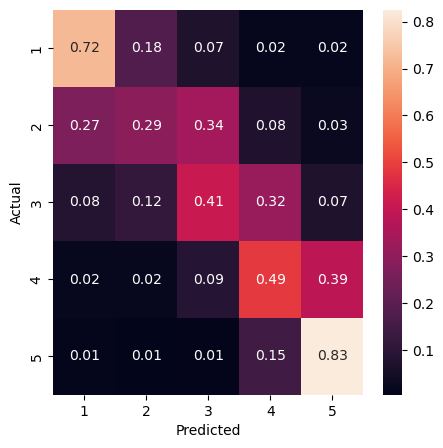

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])

plt.show(block=False)

In [20]:
#ratings to binary 0/1
#negative if <=3, positive if >3
df['binary_st'] = np.where(df['review_stars'] <= 3, 0, 1)

In [26]:
#ratings 0/1/2
rating_mapping = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}
df['tri_st'] = df['review_stars'].map(rating_mapping)

In [ ]:
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from langdetect import detect

def remove_non_english_tokens(tokens):
    english_tokens = []
    
    for token in tokens:
        try:
            if detect(token) == 'en':
                english_tokens.append(token)
        except:
            pass
    
    return english_tokens


df['Tokens'] = df['clean'].apply(remove_non_english_tokens)


In [4]:
df['clean'] = df['clean'].str.replace('\d+', '', regex = True)

In [5]:
df['clean']

0         ['restaurant', 'star', 'decent', 'food', 'dinn...
1         ['amazing', 'biscuit', 'fill', 'blank', 'great...
2         ['stop', 'sunday', 'morning', 'walk', 'park', ...
3         ['honestly', 'food', 'knock', 'sock', 'people'...
4         ['man', 'place', 'nice', 'bartender', 'awesome...
                                ...                        
326351    ['slow', 'slowwwww', 'sllllooooowwwww', 'servi...
326352    ['nice', 'place', 'eat', 'pack', 'want', 'earl...
326353    ['strand', 'nashville', 'extra', 'day', 'cance...
326354    ['supper', 'club', 'ridiculously', 'expensive'...
326355    ['locate', 'walk', 'district', 'nashville', 'b...
Name: clean, Length: 326356, dtype: object

### count vectorizer unigram, 2-levels

In [30]:
X = df[['clean']]
y = df['binary_st']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

vect = CountVectorizer()
X_train_vec = vect.fit_transform(X_train['clean'])
X_test_vec = vect.transform(X_test['clean'])

In [31]:
nb = MultinomialNB().fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

In [32]:
accuracy_score(y_test, y_pred)

0.8838814055816347

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     24621
           1       0.90      0.93      0.92     56968

    accuracy                           0.88     81589
   macro avg       0.87      0.85      0.86     81589
weighted avg       0.88      0.88      0.88     81589



In [34]:
vect.get_feature_names_out()

array(['__kgqzekgsbkfqnddba', '_dxwnxvfg', '_t', ..., '饺子', '鳥唐揚げ', '麻辣'],
      dtype=object)

In [ ]:
#BINARY IMPORTANT FEATURES

In [35]:
def important_features(vectorizer,classifier,n=40):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names_out()

    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]

    print("Important words in negative reviews")

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print("-----------------------------------------")
    print("Important words in positive reviews")

    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat)

In [36]:
important_features(vect, nb, n=40)

Important words in negative reviews
0 64723.0 food
0 52819.0 order
0 52495.0 good
0 44360.0 place
0 35113.0 like
0 33351.0 come
0 32167.0 time
0 30481.0 service
0 24713.0 go
0 24231.0 wait
0 24101.0 get
0 21790.0 restaurant
0 20651.0 great
0 20361.0 table
0 19914.0 drink
0 19887.0 try
0 19534.0 chicken
0 19212.0 eat
0 19042.0 ask
0 17587.0 minute
0 17464.0 bad
0 17115.0 want
0 17035.0 say
0 14929.0 bar
0 14735.0 take
0 14701.0 tell
0 14578.0 nashville
0 14473.0 well
0 14338.0 think
0 14223.0 look
0 14167.0 taste
0 13599.0 experience
0 13482.0 menu
0 13345.0 server
0 12876.0 people
0 12625.0 know
0 12127.0 leave
0 11998.0 nice
0 11782.0 pretty
0 11280.0 cheese
-----------------------------------------
Important words in positive reviews
1 133011.0 good
1 107969.0 food
1 104157.0 great
1 95450.0 place
1 58663.0 nashville
1 58042.0 order
1 52576.0 time
1 50387.0 come
1 50232.0 service
1 49752.0 chicken
1 48420.0 like
1 45739.0 love
1 44965.0 try
1 43396.0 delicious
1 39609.0 get
1 35383.0

### Count vectorizer with bigram using 5 levels

In [39]:
X = df[['clean']]
y = df['review_stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

vect = CountVectorizer(ngram_range=(2, 2))

X_train_vec = vect.fit_transform(X_train['clean'])
X_test_vec = vect.transform(X_test['clean'])

In [40]:
%%time
nb = MultinomialNB().fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

CPU times: total: 688 ms
Wall time: 681 ms


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.69      0.70      8756
           2       0.42      0.08      0.14      6577
           3       0.36      0.11      0.17      9288
           4       0.38      0.29      0.33     19174
           5       0.66      0.94      0.77     37794

    accuracy                           0.60     81589
   macro avg       0.51      0.42      0.42     81589
weighted avg       0.55      0.60      0.54     81589



In [42]:
nb.feature_count_[2]

array([0., 0., 1., ..., 0., 0., 0.])

In [43]:
def important_featuresb(vectorizer,classifier,n=40):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names_out()

    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    topn_class3 = sorted(zip(classifier.feature_count_[2], feature_names),reverse=True)[:n]
    topn_class4 = sorted(zip(classifier.feature_count_[3], feature_names),reverse=True)[:n]
    topn_class5 = sorted(zip(classifier.feature_count_[4], feature_names),reverse=True)[:n]


    

    print("Important words in 1 star")

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print("-----------------------------------------")
    print("Important words in 2 star reviews")

    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat)
        
    print("-----------------------------------------")
    print("Important words in 3 star reviews")
    
    for coef, feat in topn_class3:
        print(class_labels[2], coef, feat)
        
    print("-----------------------------------------")
    print("Important words in 4 star reviews")
    
    for coef, feat in topn_class4:
        print(class_labels[3], coef, feat)
        
    print("-----------------------------------------")
    print("Important words in 5 star reviews")
    
    for coef, feat in topn_class5:
        print(class_labels[4], coef, feat)


In [44]:
important_featuresb(vect, nb, n=10)

Important words in 1 star
1 1806.0 customer service
1 1651.0 wait minute
1 1481.0 taste like
1 1021.0 look like
1 903.0 take minute
1 870.0 food good
1 820.0 place order
1 802.0 minute later
1 801.0 bad service
1 776.0 wait hour
-----------------------------------------
Important words in 2 star reviews
2 1353.0 taste like
2 1168.0 food good
2 918.0 wait minute
2 910.0 feel like
2 804.0 mac cheese
2 772.0 pretty good
2 755.0 look like
2 646.0 take minute
2 625.0 hot chicken
2 600.0 customer service
-----------------------------------------
Important words in 3 star reviews
3 2244.0 food good
3 2131.0 pretty good
3 1458.0 mac cheese
3 1367.0 feel like
3 1333.0 hot chicken
3 1109.0 taste like
3 976.0 good food
3 922.0 service good
3 781.0 good service
3 767.0 happy hour
-----------------------------------------
Important words in 4 star reviews
4 3650.0 food good
4 3637.0 hot chicken
4 3621.0 mac cheese
4 2884.0 pretty good
4 2535.0 good food
4 2282.0 great place
4 1966.0 food great
4 19

In [46]:
def not_important_features(vectorizer,classifier,n=40):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names_out()

    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[-n:]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[-n:]
    topn_class3 = sorted(zip(classifier.feature_count_[2], feature_names),reverse=True)[-n:]
    topn_class4 = sorted(zip(classifier.feature_count_[3], feature_names),reverse=True)[-n:]
    topn_class5 = sorted(zip(classifier.feature_count_[4], feature_names),reverse=True)[-n:]


    

    print("Least Important words in 1 star")

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print("-----------------------------------------")
    print("Least Important words in 2 star reviews")

    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat)
        
    print("-----------------------------------------")
    print("Least Important words in 3 star reviews")
    
    for coef, feat in topn_class3:
        print(class_labels[2], coef, feat)
        
    print("-----------------------------------------")
    print("Least Important words in 4 star reviews")
    
    for coef, feat in topn_class4:
        print(class_labels[3], coef, feat)
        
    print("-----------------------------------------")
    print("Least important words in 5 star reviews")
    
    for coef, feat in topn_class5:
        print(class_labels[4], coef, feat)


In [47]:
not_important_features(vect, nb, n=10)

Least Important words in 1 star
1 0.0 aa great
1 0.0 aa good
1 0.0 aa fresh
1 0.0 aa far
1 0.0 aa fan
1 0.0 aa customer
1 0.0 aa couscous
1 0.0 aa chip
1 0.0 aa barista
1 0.0 __ mimosa
-----------------------------------------
Least Important words in 2 star reviews
2 0.0 aa good
2 0.0 aa fresh
2 0.0 aa far
2 0.0 aa fan
2 0.0 aa customer
2 0.0 aa couscous
2 0.0 aa chip
2 0.0 aa barista
2 0.0 a_m pm
2 0.0 __ mimosa
-----------------------------------------
Least Important words in 3 star reviews
3 0.0 aa great
3 0.0 aa good
3 0.0 aa fresh
3 0.0 aa far
3 0.0 aa fan
3 0.0 aa customer
3 0.0 aa couscous
3 0.0 aa chip
3 0.0 a_m pm
3 0.0 __ mimosa
-----------------------------------------
Least Important words in 4 star reviews
4 0.0 aa sighting
4 0.0 aa serve
4 0.0 aa saturday
4 0.0 aa leap
4 0.0 aa large
4 0.0 aa fan
4 0.0 aa couscous
4 0.0 aa barista
4 0.0 a_m pm
4 0.0 __ mimosa
-----------------------------------------
Least important words in 5 star reviews
5 0.0 aa large
5 0.0 aa hospit

### Count vectorizer with bigram using 2 levels

In [56]:
X = df[['clean']]
y = df['binary_st']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

vect = CountVectorizer(ngram_range=(2, 2))

X_train_vec = vect.fit_transform(X_train['clean'])
X_test_vec = vect.transform(X_test['clean'])


nb = MultinomialNB().fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79     24621
           1       0.88      0.97      0.92     56968

    accuracy                           0.89     81589
   macro avg       0.90      0.83      0.86     81589
weighted avg       0.89      0.89      0.88     81589



### Count vectorizer with trigram using 2 levels

In [57]:
X = df[['clean']]
y = df['binary_st']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

vect = CountVectorizer(ngram_range=(3, 3))

X_train_vec = vect.fit_transform(X_train['clean'])
X_test_vec = vect.transform(X_test['clean'])


nb = MultinomialNB().fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67     24621
           1       0.83      0.97      0.89     56968

    accuracy                           0.84     81589
   macro avg       0.85      0.76      0.78     81589
weighted avg       0.84      0.84      0.83     81589



In [66]:
important_features(vect, nb, n=40)

Important words in negative reviews
0 474.0 sweet potato fry
0 428.0 food pretty good
0 420.0 want like place
0 417.0 food good service
0 320.0 nashville hot chicken
0 291.0 take long time
0 267.0 take drink order
0 264.0 waste time money
0 256.0 bad customer service
0 252.0 want love place
0 231.0 excited try place
0 221.0 service good food
0 219.0 wait minute food
0 219.0 wait hour food
0 213.0 let start say
0 199.0 fried green tomato
0 196.0 hear good thing
0 193.0 seat right away
0 193.0 mac cheese good
0 187.0 food great service
0 186.0 fry green tomato
0 180.0 hear great thing
0 179.0 wait long time
0 177.0 wait wait wait
0 174.0 poor customer service
0 173.0 give place star
0 171.0 get order wrong
0 169.0 come minute later
0 163.0 service great food
0 162.0 ask speak manager
0 160.0 good customer service
0 159.0 reason give star
0 158.0 good food good
0 156.0 take minute food
0 156.0 leave lot desire
0 154.0 good thing place
0 154.0 food good great
0 153.0 terrible customer serv

normalize large number of reviews
hugging face for bert
bert based 

In [67]:
df.groupby('name')['review_stars'].agg(['mean', 'count']).sort_values(ascending = False, by='count').head(10)

,mean,count
name,,
Hattie B’s Hot Chicken - Nashville,4.446266,6160
Biscuit Love: Gulch,4.171180,4247
The Pharmacy,4.044122,3105
Martin's Bar-B-Que Joint,4.082548,3077
Peg Leg Porker,4.344792,2909
Puckett's Grocery & Restaurant,3.890838,2794
The Stillery,4.449962,2618
Loveless Cafe,4.293548,2480
The Southern Steak & Oyster,4.104318,2339


<Axes: ylabel='name'>

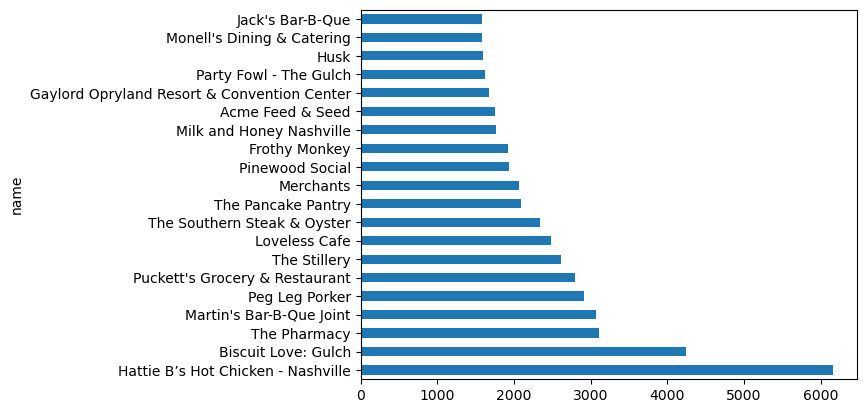

In [69]:
df.groupby('name')['review_stars'].count().sort_values(ascending = False).head(20).plot(kind = 'barh')

In [ ]:
#C

### Using Undersampled Data
#### Count vectorizer(3,3) , nb

In [48]:
#Undersampled Data
df_us = pd.read_csv('../data/df_undersampledbyrest.csv').drop(columns = 'Unnamed: 0')

C:\Users\16156\AppData\Local\Temp\ipykernel_23076\2360949352.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_us = pd.read_csv('../data/df_undersampledbyrest.csv').drop(columns = 'Unnamed: 0')


In [ ]:
df_us['']

In [80]:
X = df_us[['clean']]
y = df_us['review_stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

vect = CountVectorizer(ngram_range=(3, 3))

X_train_vec = vect.fit_transform(X_train['clean'])
X_test_vec = vect.transform(X_test['clean'])

In [81]:
%%time
nb = MultinomialNB().fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

CPU times: total: 594 ms
Wall time: 599 ms


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.43      0.52      2818
           2       0.41      0.08      0.14      1865
           3       0.28      0.07      0.11      2451
           4       0.34      0.26      0.29      4858
           5       0.56      0.87      0.68      9637

    accuracy                           0.52     21629
   macro avg       0.45      0.34      0.35     21629
weighted avg       0.47      0.52      0.46     21629



In [52]:
important_featuresb(vect, nb, n=10)

Important words in 1 star
1 86.0 bad customer service
1 60.0 waste time money
1 43.0 poor customer service
1 41.0 take drink order
1 40.0 terrible customer service
1 40.0 ask speak manager
1 39.0 wait minute food
1 37.0 wait hour food
1 37.0 food good service
1 36.0 horrible customer service
-----------------------------------------
Important words in 2 star reviews
2 56.0 want like place
2 29.0 food pretty good
2 28.0 take long time
2 27.0 sweet potato fry
2 27.0 food good service
2 25.0 want love place
2 25.0 give place star
2 24.0 service good food
2 24.0 reason give star
2 23.0 get order wrong
-----------------------------------------
Important words in 3 star reviews
3 65.0 food pretty good
3 55.0 food good service
3 39.0 want like place
3 39.0 nashville hot chicken
3 38.0 sweet potato fry
3 32.0 want love place
3 32.0 take long time
3 27.0 food good great
3 27.0 deep dish pizza
3 25.0 good food good
-----------------------------------------
Important words in 4 star reviews
4 90.

In [86]:
df[df['clean'].str.contains('mac', 'cheese')]['name'].value_counts()

Hattie B’s Hot Chicken - Nashville    2262
Peg Leg Porker                        1081
The Stillery                          1064
The Pharmacy                           898
Martin's Bar-B-Que Joint               670
                                      ... 
Agave’s                                  1
King Solomon's Gyros                     1
The Nashville Grange                     1
DeSano Pizzeria                          1
Meet Noodles                             1
Name: name, Length: 1337, dtype: int64

In [87]:
df_us[df_us['clean'].str.contains('mac', 'cheese')]['name'].value_counts()

Hattie B's Hot Chicken - Nashville West    29
Peg Leg Porker                             26
Dandgure's Classic Southern Cooking        24
Hattie B's Hot Chicken - Melrose           23
Jack's Bar-B-Que                           23
                                           ..
Past Perfect                                1
Pastaria                                    1
Ellington's                                 1
Bartella                                    1
China Star                                  1
Name: name, Length: 1144, dtype: int64

In [91]:
df.groupby('name').size().sort_values(ascending = False)

name
Hattie B’s Hot Chicken - Nashville    6160
Biscuit Love: Gulch                   4247
The Pharmacy                          3105
Martin's Bar-B-Que Joint              3077
Peg Leg Porker                        2909
                                      ... 
C'Bon                                    5
615 Waffles                              5
Tang's Chinese Restaurant                5
Buon Appetito                            5
opry back porch BBQ                      5
Length: 2084, dtype: int64

### tf-idf with ngram_range (1,3)

In [74]:
df.head().T

,0,1,2,3,4
business_id,ltBBYdNzkeKdCNPDAsxwAA,Zx7n8mdt8OzLRXVzolXNhQ,eaJCpC6IhYphj7bwCDHTwQ,oQ5CPRt0R3AzFvcjNOqB1w,9OtFX3YzG5keaUMOWU1imA
name,Tavern,Milk and Honey Nashville,Three Brothers Coffee,Edley's Bar-B-Que - 12 South,Champions
address,1904 Broadway,214 11th Ave S,2813 W End Ave,2706 12th Ave S,600 Marriott Drive
city,Nashville,Nashville,Nashville,Nashville,Nashville
state,TN,TN,TN,TN,TN
postal_code,37203.0,37203.0,37203.0,37204.0,37214.0
latitude,36.1509,36.154702,36.144808,36.122973,36.146207
longitude,-86.797012,-86.784541,-86.812266,-86.789782,-86.693053
overall_stars,4.0,4.0,4.5,4.0,4.0
review_count,1222,1725,249,1114,73


In [75]:
df['clean_join'] = df['clean'].apply(lambda x: " ".join(x))

In [76]:
df['clean_join']

0         [ ' r e s t a u r a n t ' ,   ' s t a r ' ,   ...
1         [ ' a m a z i n g ' ,   ' b i s c u i t ' ,   ...
2         [ ' s t o p ' ,   ' s u n d a y ' ,   ' m o r ...
3         [ ' h o n e s t l y ' ,   ' f o o d ' ,   ' k ...
4         [ ' m a n ' ,   ' p l a c e ' ,   ' n i c e ' ...
                                ...                        
326351    [ ' s l o w ' ,   ' s l o w w w w w ' ,   ' s ...
326352    [ ' n i c e ' ,   ' p l a c e ' ,   ' e a t ' ...
326353    [ ' s t r a n d ' ,   ' n a s h v i l l e ' , ...
326354    [ ' s u p p e r ' ,   ' c l u b ' ,   ' r i d ...
326355    [ ' l o c a t e ' ,   ' w a l k ' ,   ' d i s ...
Name: clean_join, Length: 326356, dtype: object

In [77]:
df['clean'].loc[0]

"['restaurant', 'star', 'decent', 'food', 'dinner', 'meeting', 'spend', '$', 'entrées', 'appetizer', 'flag', 'assistant', 'cook', 'guy', 'bright', 'red', 'baggy', 'pant', 'watch', 'tv', 'avocado', 'tuna', 'entrée', 'apparent', 'direct', 'help', 'situation', 'flag', 'waitress', 'bill', 'dollar', 'avocado']"

In [78]:
from ast import literal_eval

In [ ]:
df['clean_join'] = df['clean'].apply(lambda x: " ".join(literal_eval(x)))

In [104]:
df['clean_join'] = df['clean'].str.replace("'", "").str.replace(",", "").str.replace("[", "").str.replace("]", "")

C:\Users\16156\AppData\Local\Temp\ipykernel_23076\2479323302.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['clean_join'] = df['clean'].str.replace("'", "").str.replace(",", "").str.replace("[", "").str.replace("]", "")


In [105]:
df['clean_join']

0         restaurant star decent food dinner meeting spe...
1         amazing biscuit fill blank great cocktail high...
2         stop sunday morning walk park great food coffe...
3         honestly food knock sock people love place hus...
4         man place nice bartender awesome try burger fr...
                                ...                        
326351    slow slowwwww sllllooooowwwww service order wr...
326352             nice place eat pack want early go sunday
326353    strand nashville extra day cancel flight need ...
326354    supper club ridiculously expensive go downstai...
326355    locate walk district nashville bit way mission...
Name: clean_join, Length: 326356, dtype: object

In [106]:
%%time
X = df[['clean_join']]
y = df['review_stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, test_size=0.25, stratify=y)


vectorizer= TfidfVectorizer(ngram_range=(1,3))
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

CPU times: total: 344 ms
Wall time: 389 ms


In [107]:
tf_x_train.shape

(1, 1)

In [108]:
X_train.shape

(244767, 1)

In [109]:
X_train.head()

,clean_join
125629,bad place great friendly people favorite dinin...
12139,great ambience staff friendly place spacious i...
211886,niece turn today favorite place chili decide c...
135292,enjoy agave think place maybe page drink page ...
318103,chipotle normally fine sure problem cheese war...


In [110]:
%%time
nb = MultinomialNB().fit(tf_x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1, 244767]

In [58]:
tf_x_train.shape

(1, 1)

In [59]:
tf_x_train

<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(tf_x_train,y_train)

y_test_pred=clf.predict(tf_x_test)

print(classification_report(y_test, y_test_pred))